-1) Importing the data

In [ ]:
#basic imports
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

#sklearn imports
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#importing the data
data = pd.read_csv("/content/drive/MyDrive/clean_zebra_data.csv")

#separating labels
X = data.drop("labels", axis = 1)
y=data['labels']

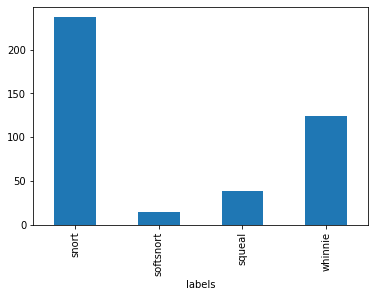

In [ ]:
#the data is quite concentrated on snorts and whinies
datacount= data[['labels']].groupby(data['labels']).agg('count')
datacount.plot(kind = 'bar', legend= False)

0) First, divide into a part of the data that I will use, and a part of the data that I will not use

In [ ]:
df_train,df_test = train_test_split(data, test_size = 0.3,stratify = data['labels'])


Now we will split df_train into minority classes df and majority classes df. With those two datasets, we upsample the minority dataset and merge with the original majority dataset

In [ ]:
filter_list = ['whinnie', 'snort']
minor_filter_list = ['softsnort', 'squeal']
df_train_major = df_train[df_train.labels.isin(filter_list)]
df_train_minor = df_train[df_train.labels.isin(minor_filter_list)]

In [ ]:
#actually doing the upscaling
df_train_minor_upsampled = resample(df_train_minor, 
                                    replace=True,    # sample with replacement
                                    n_samples= 252 , # to match majority class
                                    random_state=42)
df_train_new = df_train_minor_upsampled.append(df_train_major)

In [ ]:
#splitting the df_train into train and test
y_train = df_train_new['labels']
X_train = df_train_new.drop("labels",axis = 1)

In [ ]:
#creating X train, test and y train and test
X_test = df_test.drop('labels',axis =1)
y_test =  df_test['labels']

# Best Random Forest model with upsampling

In [ ]:
#defining the rf model
best_r_model = RandomForestClassifier(max_depth = 4, min_samples_split = 12, n_estimators = 461)

In [ ]:
#fitting it - upsampling
best_r_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_split=12, n_estimators=461)

In [ ]:
#scores
best_r_model.score(X_train,y_train)

0.998015873015873

In [ ]:
best_r_model.score(X_test,y_test)

0.9919354838709677

In [ ]:
#creating a y pred
y_pred = best_r_model.predict(X_test)

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n       snort       0.99      1.00      0.99        71\n   softsnort       1.00      0.75      0.86         4\n      squeal       1.00      1.00      1.00        12\n     whinnie       1.00      1.00      1.00        37\n\n    accuracy                           0.99       124\n   macro avg       1.00      0.94      0.96       124\nweighted avg       0.99      0.99      0.99       124\n'

In [ ]:
confusion_matrix(y_test,y_pred)

array([[71,  0,  0,  0],
       [ 1,  3,  0,  0],
       [ 0,  0, 12,  0],
       [ 0,  0,  0, 37]])

# RFE with Random Forest

In [ ]:
# define dataset
X = data.drop('labels',axis = 1)
y = data['labels']

In [ ]:
# messing up with the data to test the selector
#import random
#X['random'] = random.sample(range(0,10000),413)

In [ ]:
#Selecting from model
model = RandomForestClassifier(max_depth = 5, min_samples_split = 15, n_estimators = 15)
estimator = SelectFromModel(model)

estimator.fit(X_train,y_train)
estimator.get_support()


array([ True,  True, False,  True, False, False, False, False, False])

In [ ]:
#Now selecting the features based on this response:
X_train.columns[estimator.get_support()]

Index(['q25', 'q50', 'fpeak'], dtype='object')

best hyperparams: {'max_depth': 5, 'min_samples_split': 22, 'n_estimators': 30}
the score for training was 0.91
the score for test was 0.92

gonna run a confusion matrix now